This notebook creates Table 1 in the [universal flu vaccine blog post](https://www.cgdev.org/blog/hhs-dont-put-all-your-vaccine-shots-egg-basket).

Data on universal flu vaccine candidates was obtained from the [Universal Influenza Vaccine Technology Landscape](https://ivr.cidrap.umn.edu/universal-influenza-vaccine-technology-landscape). We only counted candidates described as "universal or broadly protective" that were under "active development."

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

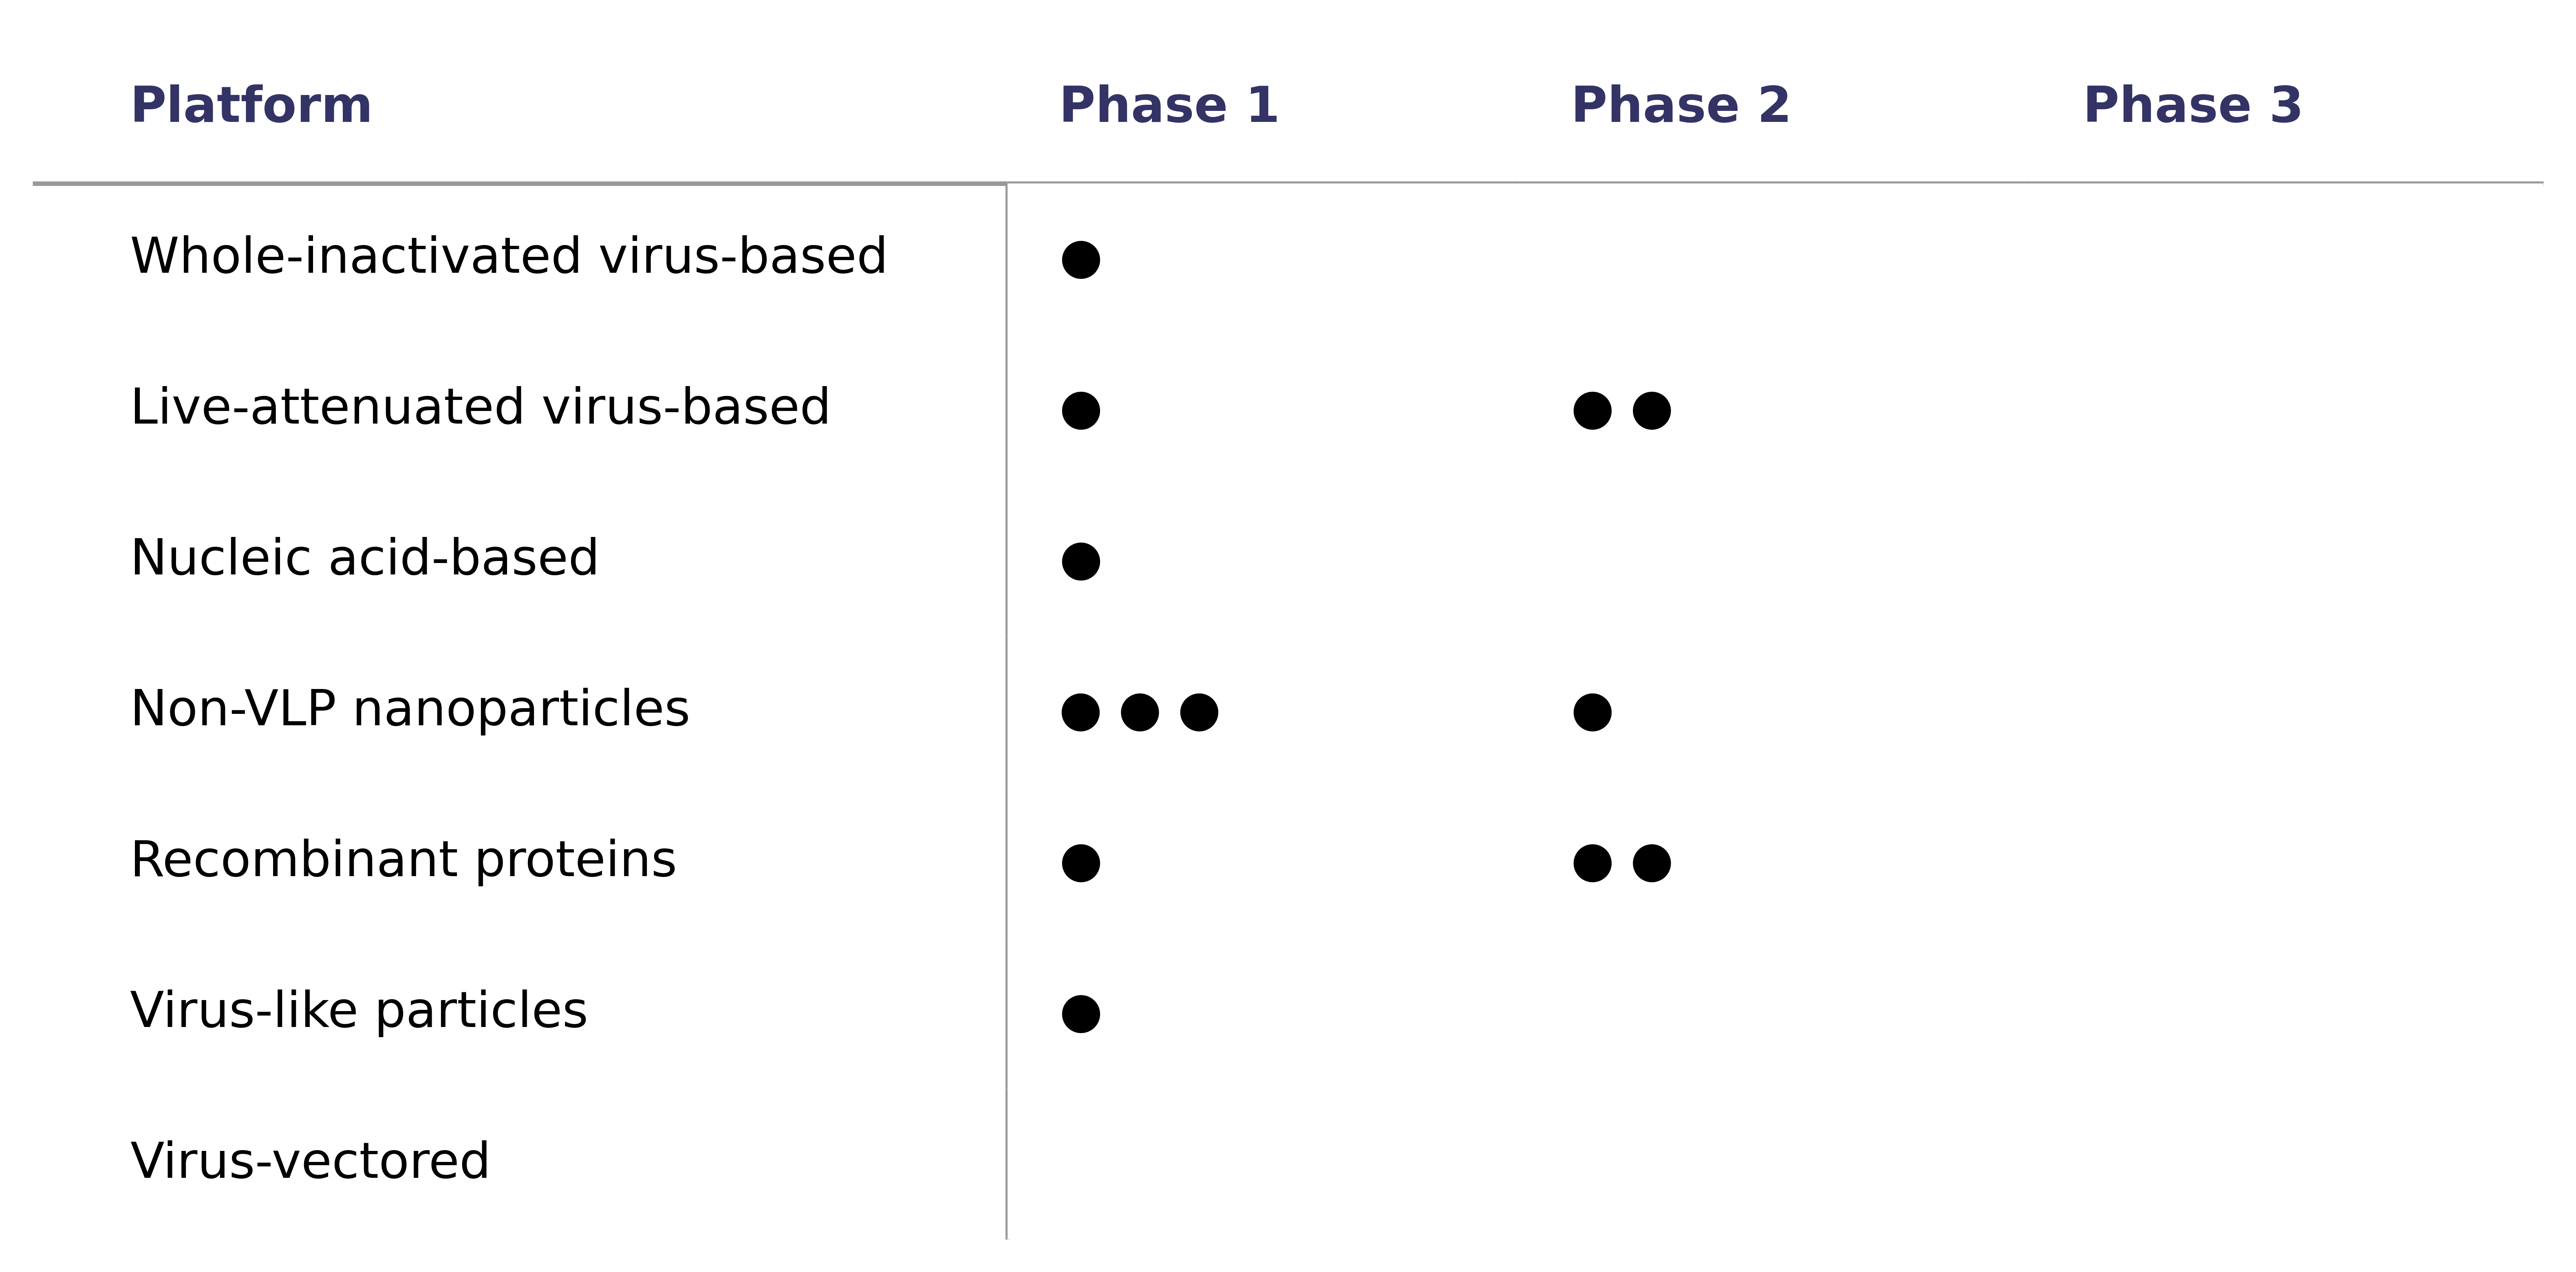

In [3]:
# Recreate the revised version of the table based on the extracted code, with suggested improvements

data = {
    "Platform": [
        "Whole-inactivated virus-based",
        "Live-attenuated virus-based",
        "Nucleic acid-based",
        "Non-VLP nanoparticles",
        "Recombinant proteins",
        "Virus-like particles",
        "Virus-vectored"
    ],
    "Phase 1": ["●", "●", "●", "● ● ●", "●", "●", ""],
    "Phase 2": ["", "● ●", "", "●", "● ●", "", ""],
    "Phase 3": ["", "", "", "", "", "", ""]
}

df = pd.DataFrame(data)

header_color = '#333366'
separator_color = '#999999'

# Create figure
fig, ax = plt.subplots(figsize=(8, 4), dpi=800)  # Increased height from 3 to 4.5
ax.axis('off')

# Create table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center',
    cellLoc='left',
    colLoc='left',
    bbox=[0, 0, 1, 1]
)

# Set font and scale
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.0, 2)

# Column widths
col_widths = [0.40, 0.21, 0.21, 0.21]
num_rows, num_cols = len(df) + 1, len(df.columns)

for row in range(num_rows):
    for col in range(num_cols):
        cell = table[(row, col)]
        cell.set_width(col_widths[col])
        cell.set_facecolor('white')
        cell.set_linewidth(0)

        if row == 0:
            cell.set_text_props(weight='bold', color=header_color)
            cell.visible_edges = 'B'
            cell.set_edgecolor(separator_color)
            cell.set_linewidth(1)
        elif col == 0:
            cell.visible_edges = 'R'
            cell.set_edgecolor(separator_color)
            cell.set_linewidth(1)

# Title
# plt.title("Universal flu vaccine candidates by platform and clinical trial phase", 
#           fontsize=13.5, weight='bold', pad=15)

plt.tight_layout()
output_path = "universal_flu_vaccine_candidates.png"
plt.savefig(output_path, dpi=800)